#**MERGING DATASET**

In [ ]:
import pandas as pd

# DEFINING THE PATHS
ongoing_trip_path = "/content/On-going trip data.csv"
known_routes_path = "/content/known_route_repo.csv"

# LOADING THE DATASET
ongoing_trip_df = pd.read_csv(ongoing_trip_path)
known_routes_df = pd.read_csv(known_routes_path)

# MERGING ON THE BASIS OF TIMESTAMP
merged_df = pd.merge(ongoing_trip_df, known_routes_df, on="timestamp")


# SAVING THE MERGED DATASET
merged_csv_path = "merged_trip_data.csv"
merged_df.to_csv(merged_csv_path, index=False)

print(f"Merged dataset saved as {merged_csv_path}")


Merged dataset saved as merged_trip_data.csv


In [ ]:
### imp
import pandas as pd
from scipy.spatial import KDTree

# Define file paths
known_routes_path = "/content/known_route_repo.csv"
ongoing_trip_df = "/content/On-going trip data.csv"



# LOADING THE DATASET
ongoing_trip_df = pd.read_csv(ongoing_trip_df)
known_routes_df = pd.read_csv(known_routes_path)

# Display dataset info and preview
def dataset_summary(df, name):
    print(f"\n{name} Dataset Summary:")
    print(df.info())
    print(df.head())

dataset_summary(known_routes_df, "Known Routes")
dataset_summary(ongoing_trip_df, "Ongoing Trip Data")

# Build KDTree for known route coordinates
known_coords = list(zip(known_routes_df["latitude"], known_routes_df["longitude"]))
kdtree = KDTree(known_coords)

# Find nearest known route point for each pallet location
pallet_coords = list(zip(ongoing_trip_df["latitude"], ongoing_trip_df["longitude"]))
distances, _ = kdtree.query(pallet_coords)

# Convert distances to kilometers (approx. 1 degree ≈ 111 km)
ongoing_trip_df["min_distance_km"] = distances * 111

# Define adherence threshold (e.g., 5 km)
threshold_km = 5
ongoing_trip_df["route_adherence"] = ongoing_trip_df["min_distance_km"] <= threshold_km

# Count non-adherent pallets
non_adherent_count = ongoing_trip_df["route_adherence"].value_counts()

# Display adherence results
print("\nRoute Adherence Summary:")
print(ongoing_trip_df[["Pallet_ID", "latitude", "longitude", "min_distance_km", "route_adherence"]].head())
print("\nAdherence Count:")
print(non_adherent_count)

ongo_csv_path = "ongo_data.csv"
merged_df.to_csv(ongo_csv_path, index=False)



Known Routes Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Route_ID   3541 non-null   object 
 1   timestamp  3541 non-null   object 
 2   latitude   3541 non-null   float64
 3   longitude  3541 non-null   float64
dtypes: float64(2), object(2)
memory usage: 110.8+ KB
None
               Route_ID                   timestamp   latitude  longitude
0  0_Austin_Los Angeles  2024-07-09 04:27:31.270921  30.267115 -97.743072
1  0_Austin_Los Angeles  2024-07-09 04:37:35.836141  30.274387 -97.761541
2  0_Austin_Los Angeles  2024-07-09 04:47:40.401361  30.264452 -97.786738
3  0_Austin_Los Angeles  2024-07-09 04:57:44.966581  30.236759 -97.840425
4  0_Austin_Los Angeles  2024-07-09 05:07:49.531801  30.232651 -97.876297

Ongoing Trip Data Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns

In [ ]:

import pandas as pd
from scipy.spatial import KDTree

# Define file paths
known_routes_path = "/content/known_route_repo.csv"
ongoing_trip_df = "/content/On-going trip data.csv"

# Load datasets
ongoing_trip_df = pd.read_csv(ongoing_trip_df)
known_routes_df = pd.read_csv(known_routes_path)

# Display dataset info and preview
def dataset_summary(df, name):
    print(f"\n{name} Dataset Summary:")
    print(df.info())
    print(df.head())

dataset_summary(known_routes_df, "Known Routes")
dataset_summary(ongoing_trip_df, "Ongoing Trip Data")

# Build KDTree for known route coordinates
known_coords = list(zip(known_routes_df["latitude"], known_routes_df["longitude"]))
kdtree = KDTree(known_coords)

# Find nearest known route point for each pallet location
pallet_coords = list(zip(ongoing_trip_df["latitude"], ongoing_trip_df["longitude"]))
distances, _ = kdtree.query(pallet_coords)

# Convert distances to kilometers (approx. 1 degree ≈ 111 km)
ongoing_trip_df["min_distance_km"] = distances * 111

# Define adherence threshold (e.g., 5 km)
threshold_km = 5
ongoing_trip_df["route_adherence"] = ongoing_trip_df["min_distance_km"] <= threshold_km

# Count non-adherent pallets
non_adherent_count = ongoing_trip_df["route_adherence"].value_counts()

# Display adherence results
print("\nRoute Adherence Summary: ")
print(ongoing_trip_df[["Pallet_ID", "latitude", "longitude", "min_distance_km", "route_adherence"]].head())
print("\nAdherence Count:")
print(non_adherent_count)
# Define the output file path
filtered_csv_path = "filtered_ongoing_trip_data.csv"

# Select relevant columns
filtered_df = ongoing_trip_df[["Pallet_ID", "latitude", "longitude", "min_distance_km", "route_adherence"]]

# Save to CSV file
filtered_df.to_csv(filtered_csv_path, index=False)

# Print confirmation
print(f"Filtered data saved successfully to {filtered_csv_path}")



Known Routes Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Route_ID   3541 non-null   object 
 1   timestamp  3541 non-null   object 
 2   latitude   3541 non-null   float64
 3   longitude  3541 non-null   float64
dtypes: float64(2), object(2)
memory usage: 110.8+ KB
None
               Route_ID                   timestamp   latitude  longitude
0  0_Austin_Los Angeles  2024-07-09 04:27:31.270921  30.267115 -97.743072
1  0_Austin_Los Angeles  2024-07-09 04:37:35.836141  30.274387 -97.761541
2  0_Austin_Los Angeles  2024-07-09 04:47:40.401361  30.264452 -97.786738
3  0_Austin_Los Angeles  2024-07-09 04:57:44.966581  30.236759 -97.840425
4  0_Austin_Los Angeles  2024-07-09 05:07:49.531801  30.232651 -97.876297

Ongoing Trip Data Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns

2025-02-14 12:01:15.994 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-02-14 12:01:15.997 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-02-14 12:01:16.000 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 12:01:16.143 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-14 12:01:16.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 12:01:16.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 12:01:16.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 12:01:16.160 Thread 'MainThread': missin

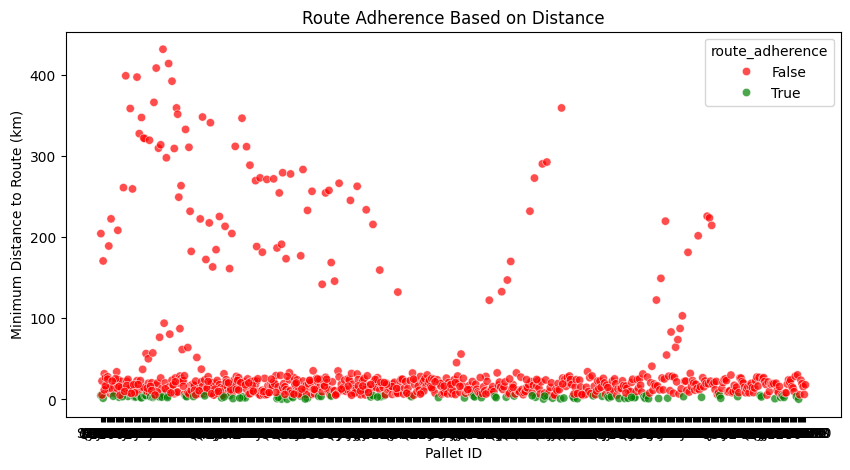

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "filtered_ongoing_trip_data.csv"

@st.cache_data
def load_data():
    df = pd.read_csv(file_path)
    return df

df = load_data()

# Page Title
st.title("Pallet Route Adherence Analysis")

# Display Dataset Summary
st.subheader("Dataset Preview")
st.write(df.head())

# Visualization: Pallet ID vs Min Distance with Route Adherence
st.subheader("Pallet ID vs Minimum Distance (Route Adherence)")

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(
    data=df,
    x="Pallet_ID",
    y="min_distance_km",
    hue="route_adherence",
    palette={True: "green", False: "red"},
    alpha=0.7,
    ax=ax
)

ax.set_xlabel("Pallet ID")
ax.set_ylabel("Minimum Distance to Route (km)")
ax.set_title("Route Adherence Based on Distance")

st.pyplot(fig)

# Display dataset statistics
st.subheader("Adherence Statistics")
st.write(df["route_adherence"].value_counts())



In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


**POWER CONSUMPTION CASE STUDY**

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from haversine import haversine, Unit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime

# Load Data
ongoing_trip_df = pd.read_csv('/content/Updated_On-going_trip_data.csv')
known_routes_df = pd.read_csv('/content/known_route_repo.csv')

ongoing_trip_df['Timestamp'] = pd.to_datetime(ongoing_trip_df['Timestamp'])
known_routes_df['Timestamp'] = pd.to_datetime(known_routes_df['Timestamp'])

def calculate_distance(lat1, lon1, lat2, lon2):
    return haversine((lat1, lon1), (lat2, lon2), unit=Unit.KILOMETERS)

def detect_route_adherence(row):
    min_distance = float('inf')
    for _, route_row in known_routes_df.iterrows():
        distance = calculate_distance(row['Latitude'], row['Longitude'], route_row['Latitude'], route_row['Longitude'])
        min_distance = min(min_distance, distance)

    return min_distance  # Lower distance means the pallet is near a known route

ongoing_trip_df['Deviation_Distance'] = ongoing_trip_df.apply(detect_route_adherence, axis=1)

# Flag deviation if distance from known route is too high (e.g., 10 km)
ongoing_trip_df['Off_Route'] = ongoing_trip_df['Deviation_Distance'] > 10

# Identify Stationary Pallets
def detect_stationary_pallets(df, time_threshold=6):
    df = df.sort_values(by=['Pallet ID', 'Timestamp'])
    df['Time_Diff'] = df.groupby('Pallet ID')['Timestamp'].diff().dt.total_seconds() / 3600  # Convert to hours
    df['Stationary'] = df['Time_Diff'] > time_threshold  # If no movement for > time_threshold hours
    return df

ongoing_trip_df = detect_stationary_pallets(ongoing_trip_df)

# Power Consumption Prediction Model
# Generate distance traveled per pallet
ongoing_trip_df['Distance_Travelled'] = ongoing_trip_df.groupby('Pallet ID').apply(
    lambda group: group['Deviation_Distance'].diff().fillna(0)
).reset_index(level=0, drop=True)

# Generate synthetic power consumption feature (replace this with real data)
np.random.seed(42)
ongoing_trip_df['Power_Consumption'] = ongoing_trip_df['Distance_Travelled'] * np.random.uniform(0.1, 0.5, len(ongoing_trip_df))

# Train Regression Model to Predict Power Consumption
X = ongoing_trip_df[['Distance_Travelled']].fillna(0)
y = ongoing_trip_df['Power_Consumption'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Power Consumption for Future Trips
ongoing_trip_df['Predicted_Power'] = model.predict(X)

# Save Final Processed Data
ongoing_trip_df.to_csv('processed_ongoing_trip_data.csv', index=False)

# Display Summary
print("✅ Data Processing Completed")
print(ongoing_trip_df.head())


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
pip install haversine

In [ ]:
!pip install streamlit_folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 6.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from haversine import haversine, Unit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime

# Load Data
ongoing_trip_df = pd.read_csv('/content/Updated_On-going_trip_data.csv')
known_routes_df = pd.read_csv('/content/Updated_On-going_trip_data.csv')

# Convert timestamp to datetime
ongoing_trip_df['timestamp'] = pd.to_datetime(ongoing_trip_df['timestamp'])
known_routes_df['timestamp'] = pd.to_datetime(known_routes_df['timestamp'])

# Distance Calculation Function
def calculate_distance(lat1, lon1, lat2, lon2):
    return haversine((lat1, lon1), (lat2, lon2), unit=Unit.KILOMETERS)

# Detect Route Adherence (Check if a pallet is near a known route)
def detect_route_adherence(row):
    min_distance = float('inf')
    for _, route_row in known_routes_df.iterrows():
        distance = calculate_distance(row['latitude'], row['longitude'], route_row['latitude'], route_row['longitude'])
        min_distance = min(min_distance, distance)

    return min_distance  # Lower distance means the pallet is near a known route

# Apply route adherence function
ongoing_trip_df['Deviation_Distance'] = ongoing_trip_df.apply(detect_route_adherence, axis=1)

# Flag deviation if distance from known route is too high (e.g., 10 km)
ongoing_trip_df['Off_Route'] = ongoing_trip_df['Deviation_Distance'] > 10

# Identify Stationary Pallets
def detect_stationary_pallets(df, time_threshold=6):
    df = df.sort_values(by=['Pallet ID', 'timestamp'])
    df['Time_Diff'] = df.groupby('Pallet ID')['timestamp'].diff().dt.total_seconds() / 3600  # Convert to hours
    df['Stationary'] = df['Time_Diff'] > time_threshold  # If no movement for > time_threshold hours
    return df

ongoing_trip_df = detect_stationary_pallets(ongoing_trip_df)

# Generate distance traveled per pallet
ongoing_trip_df['Distance_Travelled'] = ongoing_trip_df.groupby('Pallet ID').apply(
    lambda group: group['Deviation_Distance'].diff().fillna(0)
).reset_index(level=0, drop=True)

# Ensure Power_Consumption is used directly (no synthetic data)
if 'Power_Consumption' not in ongoing_trip_df.columns:
    raise ValueError("❌ Power_Consumption column is missing from the dataset!")

# Train Regression Model to Predict Power Consumption
X = ongoing_trip_df[['Distance_Travelled']].fillna(0)
y = ongoing_trip_df['Power_Consumption'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Power Consumption for Future Trips
ongoing_trip_df['Predicted_Power'] = model.predict(X)

# Save Final Processed Data
ongoing_trip_df.to_csv('processed_ongoing_trip_data.csv', index=False)

# Display Summary
print("✅ Data Processing Completed (Using Existing Power Consumption Data)")
print(ongoing_trip_df.head())


KeyError: 'Pallet ID'